In [84]:
import json
import datetime
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


def collected(jsonFile):

    entries = json.load(open(jsonFile))["data"]
    r = [ {
        "dataDate": t['date'],
        "cases": t['cases'],
        "deaths": t['deaths'],
        "tests": t['tests']
        } for t in entries]
    r.sort( key=lambda x:x['dataDate'])

    windows = [
        {'date': r[i]['dataDate'],
         'cases': max(r[i]['cases']-r[i-7]['cases'],0),
         'tests': max(r[i]['tests']-r[i-7]['tests'],0),
         'deaths': r[i]['deaths']
         }
        for i in range(7,len(r))
        ]

    windows = [{
        'date' : w['date'],
        'cases' : w['cases'],
        'tests' : w['tests'],
        'deaths' : w['deaths'],
        'pos' : w['cases']/w['tests'] if (w['tests']) else 0
        }
        for w in windows
        ]
    windows = [
        {
            'date' : w['date'],
            'pos': w['pos'],
            'deaths' : w['deaths'],
            'estimate' : 28*w['cases']*math.sqrt(max(w['pos'],0.0))     
        }
        for w in windows
        ]
    windows = [
        {
        'date': w['date'],
        'pos': w['pos'],
            'deaths' : w['deaths'],
        'estimate': w['estimate']
        }
        for w in windows
        ]
    return windows


In [55]:
data=collected('lea.json')

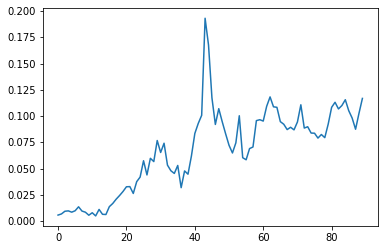

In [22]:

plt.plot([w['pos'] for w in data])

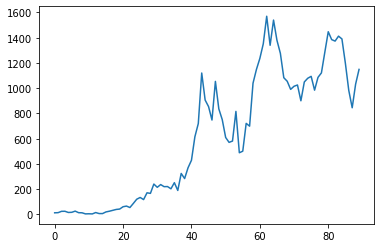

In [23]:
plt.plot([w['estimate'] for w in data])

In [27]:
sum(w['estimate'] for w in data)



54967.06348995071

In [50]:
data = collected('chaves.json')


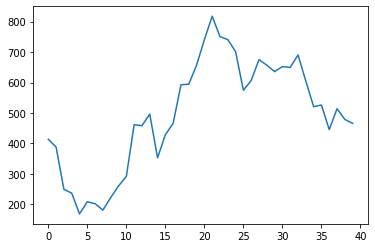

In [51]:
plt.plot([w['estimate'] for w in data[-40:]])



57.87924263708226


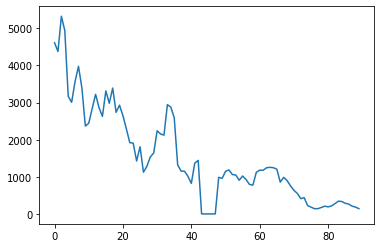

In [67]:
mckinley=collected('mckinley.json')
total=sum(m['estimate'] for m in mckinley)/10
print(total/mckinley[-1]['deaths'])
plt.plot([w['estimate'] for w in mckinley])



In [69]:
berna=collected('bernalillo.json')
total=sum(m['estimate'] for m in berna)
print(total/berna[-1]['deaths'])

953.8166177565894


104803.47240393098


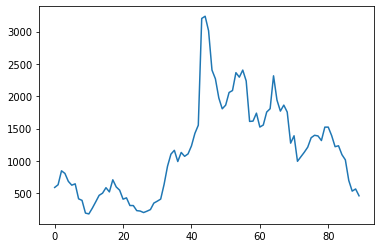

In [77]:
dona=collected('donana.json')
plt.plot([w['estimate'] for w in dona])
print(sum(w['estimate'] for w in dona))

In [86]:
chaves = collected('chaves.json')

2.4779736506659037e-05


6

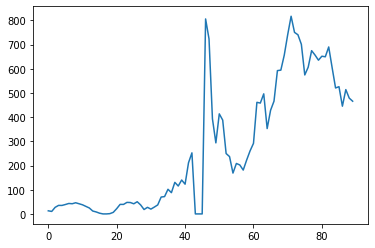

In [94]:
plt.plot([w['estimate'] for w in chaves] )
pprint.pprint(chaves[-1]['deaths']/sum(w['estimate'] for w in chaves)/10)
chaves[-1]['deaths']

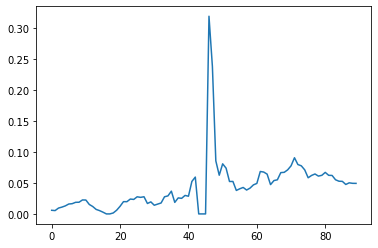

In [89]:
plt.plot([w['pos'] for w in chaves])

In [97]:
btotal=sum(w['estimate'] for w in berna)/10
bifr = berna[-1]['deaths']/btotal
mtotal = sum(m['estimate'] for m in mckinley)/10
mifr = mckinley[-1]['deaths']/mtotal
print(bifr,mifr)

0.010484195613534555 0.01727735116145623


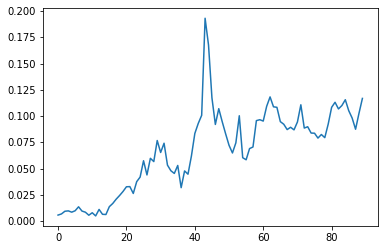

In [98]:
lea = collected('lea.json')
plt.plot([l['pos'] for l in lea])


In [99]:
pprint.pprint(lea)

[{'date': '2020-05-21',
  'deaths': 0,
  'estimate': 12.705658047703267,
  'pos': 0.005719733079122974},
 {'date': '2020-05-22',
  'deaths': 0,
  'estimate': 13.872143440592144,
  'pos': 0.006818181818181818},
 {'date': '2020-05-25',
  'deaths': 0,
  'estimate': 24.387096774193548,
  'pos': 0.009365244536940686},
 {'date': '2020-05-26',
  'deaths': 0,
  'estimate': 24.85712688057002,
  'pos': 0.00972972972972973},
 {'date': '2020-05-27',
  'deaths': 0,
  'estimate': 15.487544113347653,
  'pos': 0.0084985835694051},
 {'date': '2020-05-28',
  'deaths': 0,
  'estimate': 16.661726043663613,
  'pos': 0.009836065573770493},
 {'date': '2020-05-29',
  'deaths': 0,
  'estimate': 26.127890589687233,
  'pos': 0.013605442176870748},
 {'date': '2020-05-30',
  'deaths': 0,
  'estimate': 13.67563164037986,
  'pos': 0.009541984732824428},
 {'date': '2020-05-31',
  'deaths': 0,
  'estimate': 12.87713644324713,
  'pos': 0.008460236886632826},
 {'date': '2020-06-01',
  'deaths': 0,
  'estimate': 4.185636

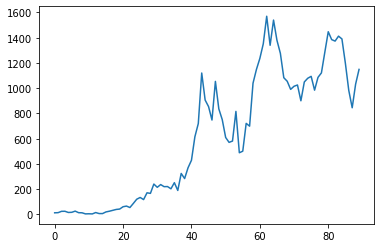

In [101]:
plt.plot([l['estimate'] for l in lea])